In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import librosa as lr
from librosa import display

In [3]:
audio, sample_rate = lr.load('../raw_data/sample_audio/Alburger, Mark, The Twelve Fingers, Op.8, ZUmCV1zUuBw.wav')

time = np.arange(0, len(audio)) / sample_rate

In [4]:
sample_rate

22050

In [37]:
S = lr.stft(audio) # S is the STFT of the input audio
S_dB = lr.amplitude_to_db(S, ref=np.max)

n_fft = 2048 # number of FFT components, default value

#Calculates the Mel Spectogram using filters
mel_basis = lr.filters.mel(sample_rate, n_fft)
mel_spectrogram = lr.core.power_to_db(mel_basis.dot(S**2)) #Convert a power spectrogram (amplitude squared) to decibel (dB) units


#Librosa built in wrapper that can be used directly.
#Takes the time domain waveform and input and gives us melspectogream
mel_spectrogram2 = lr.power_to_db(lr.feature.melspectrogram(audio, sr=sample_rate))

print("Mel Spectogram Using Filters")
print(mel_spectrogram)

print("\nBuilt in Mel Spectogram")
print(mel_spectrogram2)

Mel Spectogram Using Filters
[[-57.120827 -53.334087 -54.0025   ... -44.78061  -41.12493  -28.22437 ]
 [-67.96868  -67.96868  -67.96868  ... -44.353897 -28.399776 -20.961035]
 [-67.96868  -67.96868  -67.96868  ... -35.455185 -13.678542  -9.013623]
 ...
 [-67.96868  -67.96868  -67.96868  ... -67.96868  -67.96868  -67.96868 ]
 [-67.96868  -67.96868  -67.96868  ... -67.96868  -67.96868  -67.96868 ]
 [-67.96868  -67.96868  -67.96868  ... -67.96868  -67.96868  -67.96868 ]]

Built in Mel Spectogram
[[-55.0278   -53.08054  -54.002106 ... -41.44945  -34.19999  -19.675594]
 [-67.95982  -67.95982  -67.95982  ... -34.406048 -27.28572  -17.374279]
 [-67.95982  -67.95982  -67.95982  ... -21.647165 -11.804764  -8.740185]
 ...
 [-67.95982  -67.95982  -67.95982  ... -67.95982  -67.95982  -67.95982 ]
 [-67.95982  -67.95982  -67.95982  ... -67.95982  -67.95982  -67.95982 ]
 [-67.95982  -67.95982  -67.95982  ... -67.95982  -67.95982  -67.95982 ]]


/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_85753/1224724594.py:7: FutureWarning: Pass sr=22050, n_fft=2048 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = lr.filters.mel(sample_rate, n_fft)
/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_85753/1224724594.py:13: FutureWarning: Pass y=[-2.2254766e-05 -2.5567924e-05 -2.1185357e-05 ... -4.4733258e-03
 -3.2365641e-03 -1.3232187e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram2 = lr.power_to_db(lr.feature.melspectrogram(audio, sr=sample_rate))


Mel Spectogram Using Filters


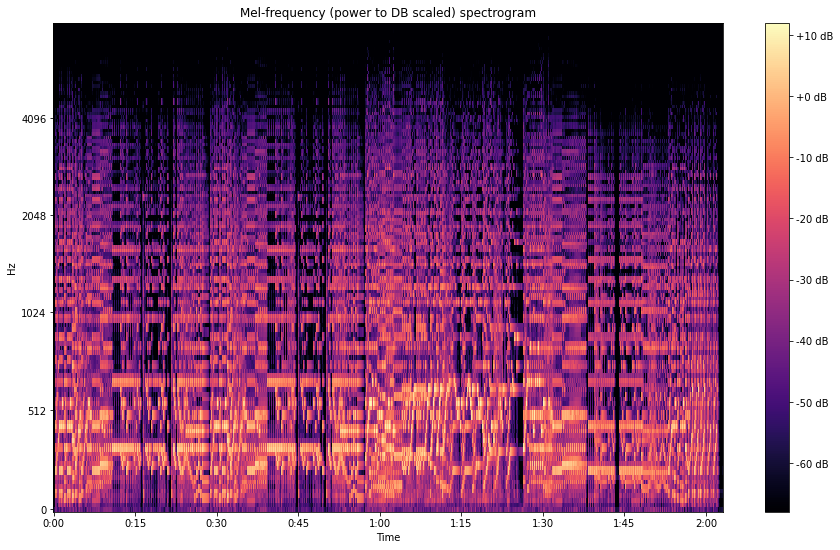

In [39]:
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(mel_spectrogram, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

print("Mel Spectogram Using Filters")

ax.set(title='Mel-frequency (power to DB scaled) spectrogram');

Built in Mel Spectogram


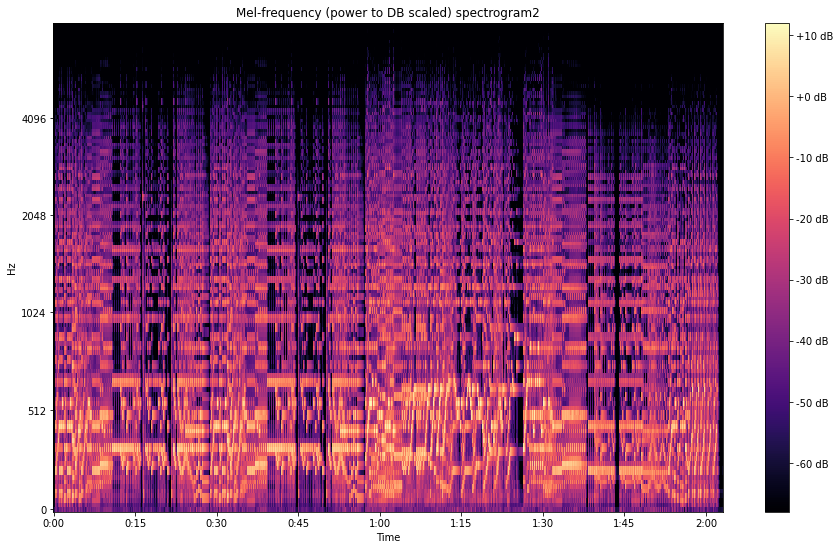

In [40]:
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(mel_spectrogram2, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

print("Built in Mel Spectogram")

ax.set(title='Mel-frequency (power to DB scaled) spectrogram2');

In [16]:
import scipy
mfcc = scipy.fftpack.dct(mel_spectrogram, axis=0)

In [17]:
mfcc

array([[-1.73718516e+04, -1.73679570e+04, -1.73697988e+04, ...,
        -1.25031670e+04, -1.11677773e+04, -1.08873125e+04],
       [ 2.58620968e+01,  2.97563267e+01,  2.79133339e+01, ...,
         2.73948828e+03,  3.34518799e+03,  3.43483081e+03],
       [ 2.58562546e+01,  2.97496128e+01,  2.79070282e+01, ...,
        -2.16855316e+02, -3.95996521e+02, -4.17054810e+02],
       ...,
       [ 9.51984406e-01,  1.09533119e+00,  1.02748871e+00, ...,
         3.61256256e+01,  5.68196564e+01,  5.41779175e+01],
       [ 6.34735107e-01,  7.30312347e-01,  6.85079575e-01, ...,
         4.19748840e+01,  3.80717773e+01,  2.70187836e+01],
       [ 3.17392349e-01,  3.65182877e-01,  3.42565536e-01, ...,
        -5.39855957e+00, -4.05179443e+01, -4.34619141e+01]], dtype=float32)

/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_85753/3305303983.py:1: FutureWarning: Pass y=[-2.2254766e-05 -2.5567924e-05 -2.1185357e-05 ... -4.4733258e-03
 -3.2365641e-03 -1.3232187e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = lr.core.power_to_db(lr.feature.mfcc(audio, sr=sample_rate))


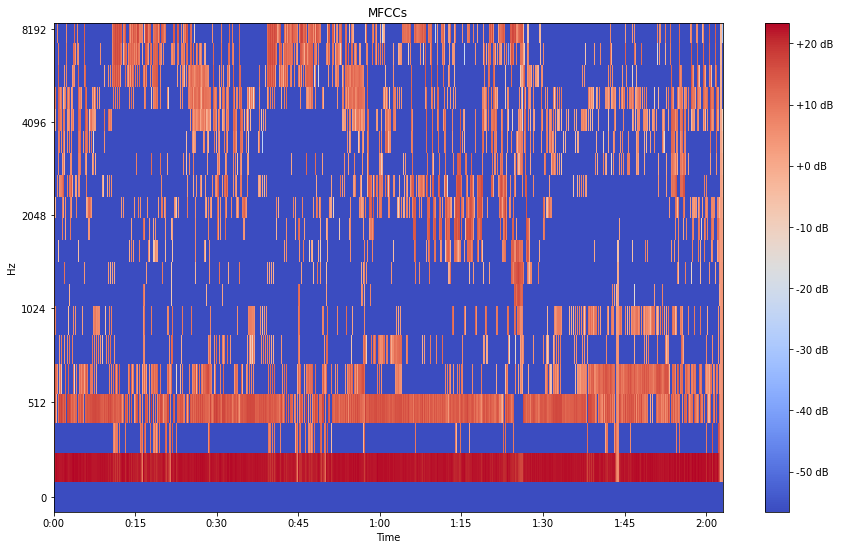

In [19]:
mfcc = lr.core.power_to_db(lr.feature.mfcc(audio, sr=sample_rate))

fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(mfcc, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='MFCCs')
plt.savefig('mfcc-librosa-db.png')